In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("country_clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


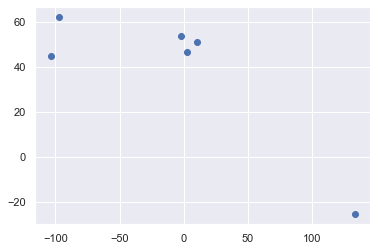

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])

In [4]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [5]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [6]:
kmeans = KMeans(3)

In [7]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


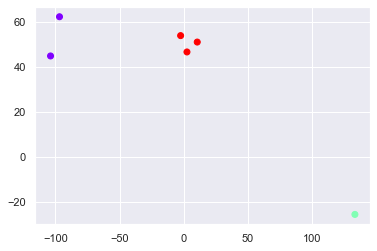

In [10]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap='rainbow')
plt.show()

In [11]:
kmeans.inertia_

290.10523333333333

In [12]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

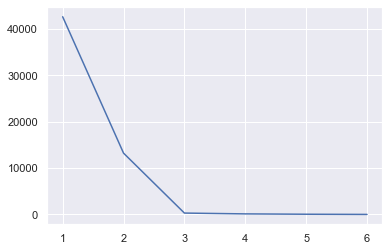

In [13]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.show()